### import package and setting parameter

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Modeling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Other settings
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
sns.set_context("paper", font_scale=1.1)
# ignore warning for axis logger of matplotlib
matplotlib.axes._axes._log.setLevel('ERROR')
%matplotlib inline

### Read CSV

In [3]:
df = pd.read_csv("bank-additional-full.csv",sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data_d = pd.get_dummies(df['y'], columns = ['y'], prefix = ['y'], drop_first = True)

### Data Analysis

In [6]:
df.columns.values,len(df.columns.values)

(array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object),
 21)

### Client Info

In [7]:
client_info=df.iloc[:,0:7]
client_info.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [8]:
print("Job \n {}\n {}".format(len(client_info['job'].unique()),client_info['job'].unique()))

Job 
 12
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [9]:
print("Marital \n {}\n {}".format(len(client_info['marital'].unique()),client_info['marital'].unique()))

Marital 
 4
 ['married' 'single' 'divorced' 'unknown']


In [10]:
print("Education \n {}\n {}".format(len(client_info['education'].unique()),client_info['education'].unique()))

Education 
 8
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [11]:
print("Default \n {}\n {}".format(len(client_info['default'].unique()),client_info['default'].unique()))

Default 
 3
 ['no' 'unknown' 'yes']


In [12]:
print("Housing \n {}\n {}".format(len(client_info['housing'].unique()),client_info['housing'].unique()))

Housing 
 3
 ['no' 'yes' 'unknown']


In [13]:
print("Loan \n {}\n {}".format(len(client_info['loan'].unique()),client_info['loan'].unique()))

Loan 
 3
 ['no' 'yes' 'unknown']


In [14]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

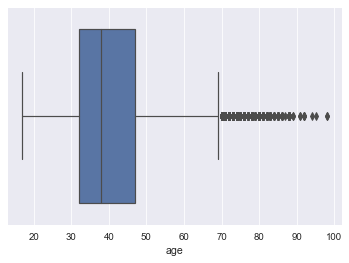

In [15]:
sns.boxplot(x=df["age"],data=df)

Text(0.5, 1.0, 'Age count distribution chart')

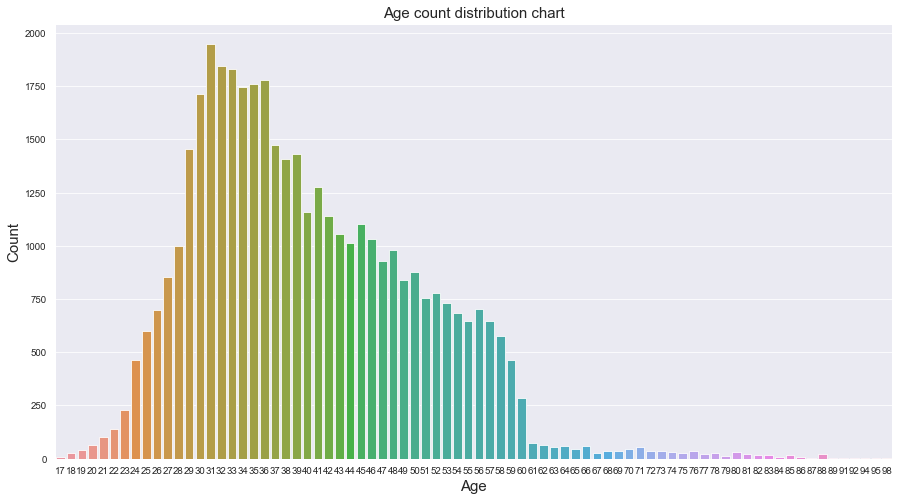

In [16]:
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
sns.countplot(x='age',data=df)
ax.set_xlabel("Age",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.set_title("Age count distribution chart",fontsize=15)

In [17]:
print(client_info['age'].describe())
higher_outlier=client_info['age'].quantile(q = 0.75)+1.5*(client_info['age'].quantile(q = 0.75)-client_info['age'].quantile(q = 0.25))
lower_outlier=client_info['age'].quantile(q = 0.25)-1.5*(client_info['age'].quantile(q = 0.75)-client_info['age'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
higher_outlier=69.5
lower_outlier=9.5


##### Job

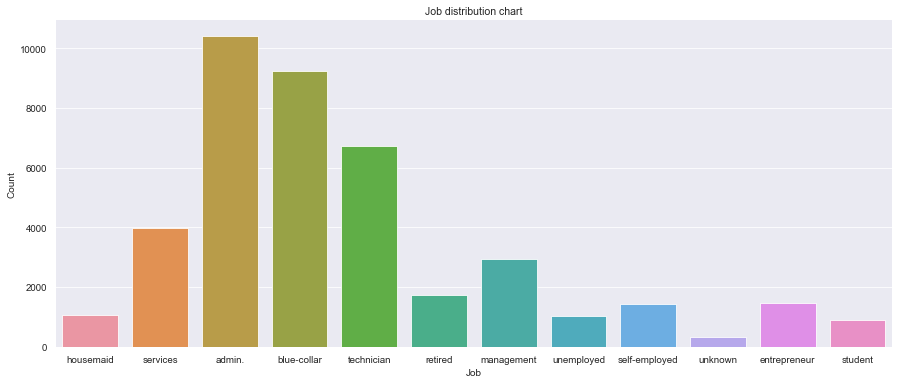

In [18]:
fig,ax=plt.subplots()
fig.set_size_inches(15,6)
sns.countplot(client_info['job'])
ax.set_xlabel("Job",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.set_title("Job distribution chart")
sns.despine()

##### Marial

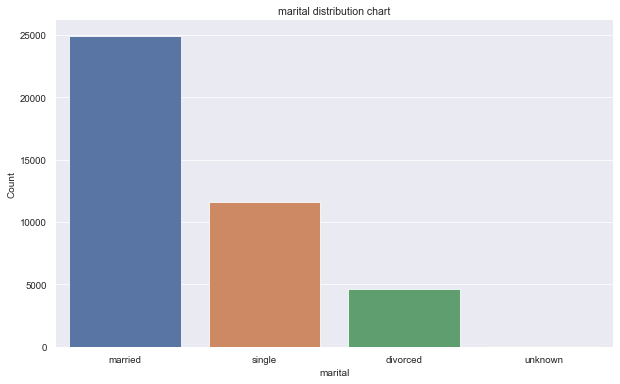

In [19]:
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
sns.countplot(client_info['marital'])
ax.set_xlabel("marital",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.set_title("marital distribution chart")
sns.despine()

##### Education

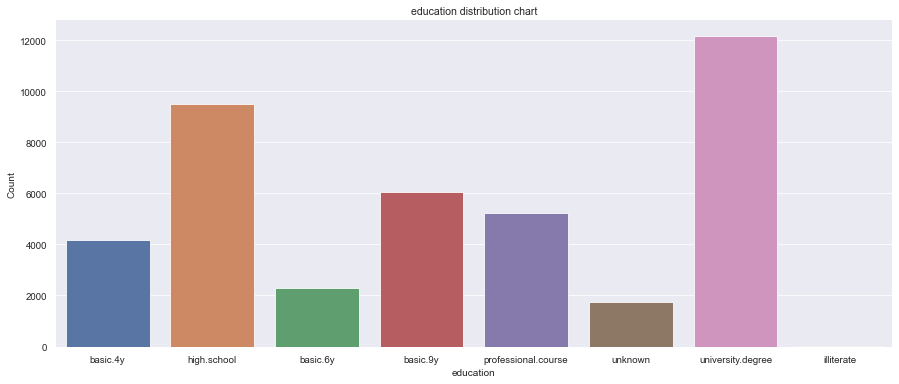

In [20]:
fig,ax=plt.subplots()
fig.set_size_inches(15,6)
sns.countplot(client_info['education'])
ax.set_xlabel("education",fontsize=10)
ax.set_ylabel("Count",fontsize=10)
ax.set_title("education distribution chart")
sns.despine()


Text(0.5, 1.0, 'loan columns data distribution chart')

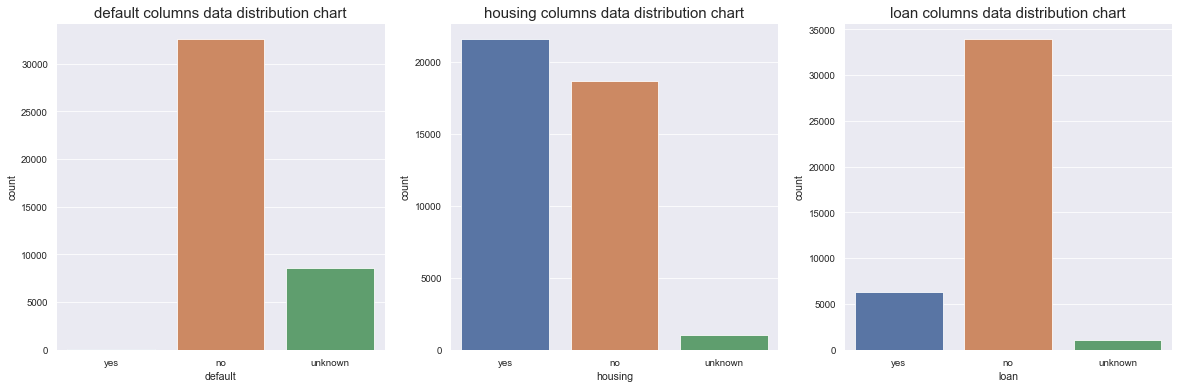

In [21]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sns.countplot(x='default',ax=ax1,data=client_info,order = ['yes', 'no', 'unknown'])
ax1.set_title("default columns data distribution chart",fontsize=15)
sns.countplot(x='housing',ax=ax2,data=client_info,order = ['yes', 'no', 'unknown'])
ax2.set_title("housing columns data distribution chart",fontsize=15)
sns.countplot(x='loan',ax=ax3,data=client_info,order = ['yes', 'no', 'unknown'])
ax3.set_title("loan columns data distribution chart",fontsize=15)


In [22]:
print("number of 'yes' in default={}\n".format(client_info[client_info['default']=='yes']['age'].count()))
print("number of 'no' in default={}\n".format(client_info[client_info['default']=='no']['age'].count()))
print("number of 'unknown' in default={}\n".format(client_info[client_info['default']=='unknown']['age'].count()))

number of 'yes' in default=3

number of 'no' in default=32588

number of 'unknown' in default=8597



In [23]:
print("number of 'yes' in housing={}\n".format(client_info[client_info['housing']=='yes']['age'].count()))
print("number of 'no' in housing={}\n".format(client_info[client_info['housing']=='no']['age'].count()))
print("number of 'unknown' in housing={}\n".format(client_info[client_info['housing']=='unknown']['age'].count()))

number of 'yes' in housing=21576

number of 'no' in housing=18622

number of 'unknown' in housing=990



In [24]:
print("number of 'yes' in loan={}\n".format(client_info[client_info['loan']=='yes']['age'].count()))
print("number of 'no' in loan={}\n".format(client_info[client_info['loan']=='no']['age'].count()))
print("number of 'unknown' in loan={}\n".format(client_info[client_info['loan']=='unknown']['age'].count()))

number of 'yes' in loan=6248

number of 'no' in loan=33950

number of 'unknown' in loan=990



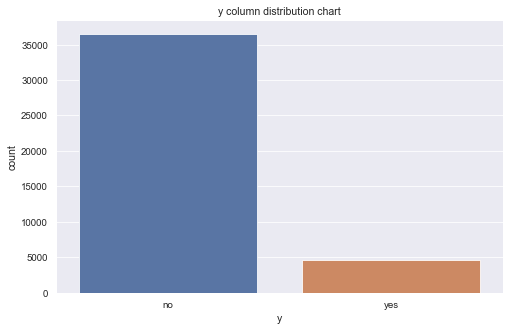

In [25]:
fig,ax=plt.subplots()
fig.set_size_inches(8,5)
sns.countplot(df['y'])
ax.set_title("y column distribution chart")
sns.despine()

Text(0.5, 1.0, "subscriptioner's age distribution chart")

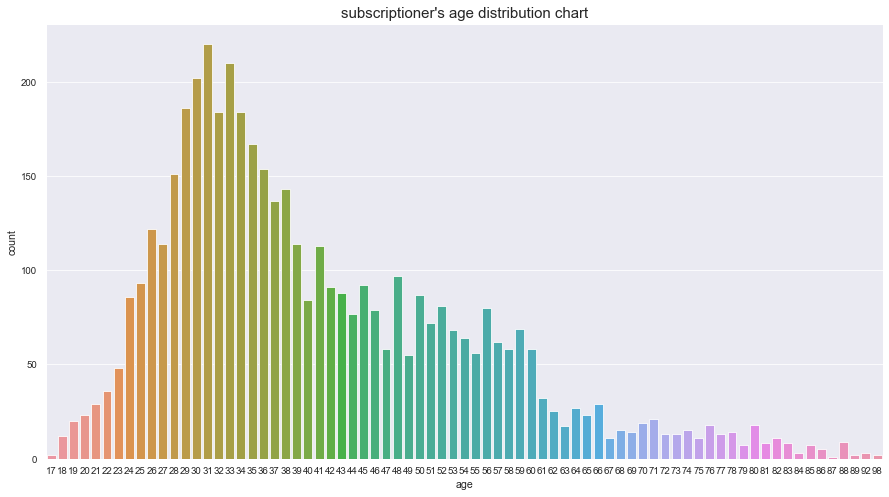

In [26]:
# Age distribution of subscriber
fig,ax=plt.subplots()
fig.set_size_inches(15,8)
sns.countplot(x='age',data=df[df['y']=='yes'])
ax.set_title("subscriptioner's age distribution chart",fontsize=15)

In [27]:
client_info_encoder=client_info.copy()
# Label encoding conversion, convert current characters into numbers
labelencoder = LabelEncoder()
client_info_encoder['job']      = labelencoder.fit_transform(client_info_encoder['job']) 
client_info_encoder['marital']  = labelencoder.fit_transform(client_info_encoder['marital']) 
client_info_encoder['education']= labelencoder.fit_transform(client_info_encoder['education']) 
client_info_encoder['default']  = labelencoder.fit_transform(client_info_encoder['default']) 
client_info_encoder['housing']  = labelencoder.fit_transform(client_info_encoder['housing']) 
client_info_encoder['loan']     = labelencoder.fit_transform(client_info_encoder['loan']) 

In [28]:
client_info_encoder.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


In [29]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

a = age(client_info_encoder)

#### social and economic context attributes

In [30]:
social_info=df.iloc[:,15:20]
social_info.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


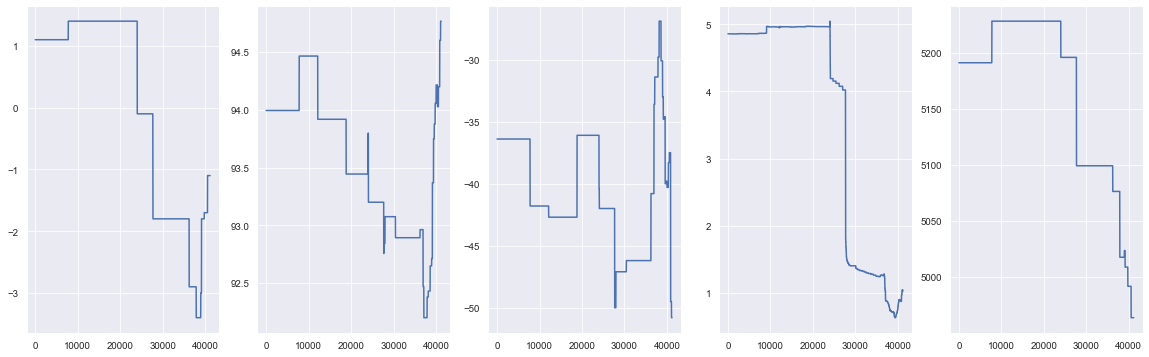

In [31]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(nrows=1,ncols=5,figsize=(20,6))
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(data=social_info['emp.var.rate'],ax=ax1)
sns.lineplot(data=social_info['cons.price.idx'],ax=ax2)
sns.lineplot(data=social_info['cons.conf.idx'],ax=ax3)
sns.lineplot(data=social_info['euribor3m'],ax=ax4)
sns.lineplot(data=social_info['nr.employed'],ax=ax5)

#### other attributes

In [32]:
other_info=df.iloc[:,11:15]
other_info.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


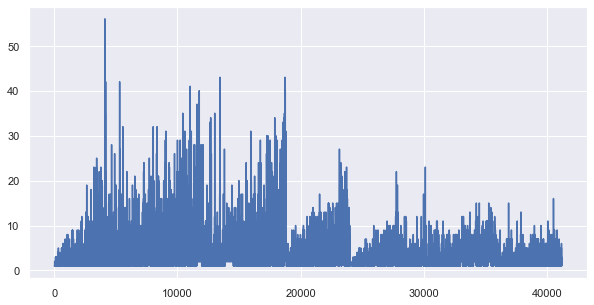

In [33]:
print(other_info['campaign'].describe())
sns.lineplot(data=other_info['campaign'])

In [34]:
#Calculate the outlier range higher_outlier and lower_outlier
higher_outlier=other_info['campaign'].quantile(q = 0.75)+1.5*(other_info['campaign'].quantile(q = 0.75)-other_info['campaign'].quantile(q = 0.25))
lower_outlier=other_info['campaign'].quantile(q = 0.25)-1.5*(other_info['campaign'].quantile(q = 0.75)-other_info['campaign'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

higher_outlier=6.0
lower_outlier=-2.0


In [35]:
def campaign(dataframe):
    dataframe.loc[dataframe['campaign'] <= 1, 'campaign'] = 1
    dataframe.loc[(dataframe['campaign'] > 1) & (dataframe['campaign'] <= 2)  , 'campaign']    = 2
    dataframe.loc[(dataframe['campaign'] > 2) & (dataframe['campaign'] <= 3)  , 'campaign']   = 3
    dataframe.loc[(dataframe['campaign'] > 3) & (dataframe['campaign'] <= 6), 'campaign'] = 4
    dataframe.loc[dataframe['campaign']  > 6, 'campaign'] = 5

campaign(other_info)

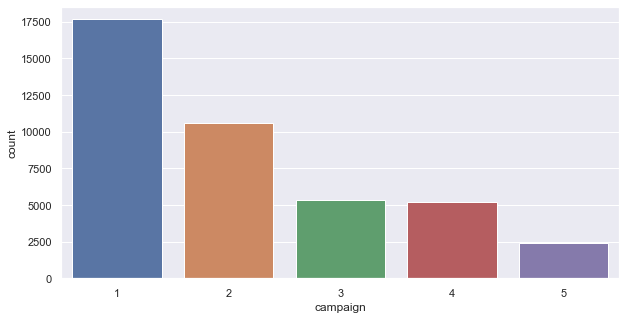

In [36]:
sns.countplot(x='campaign',data=other_info)

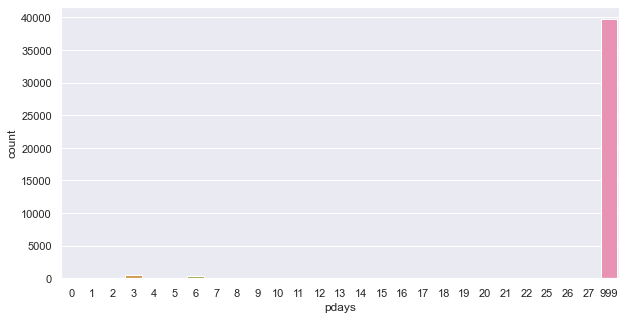

In [37]:
sns.countplot(x='pdays',data=other_info)

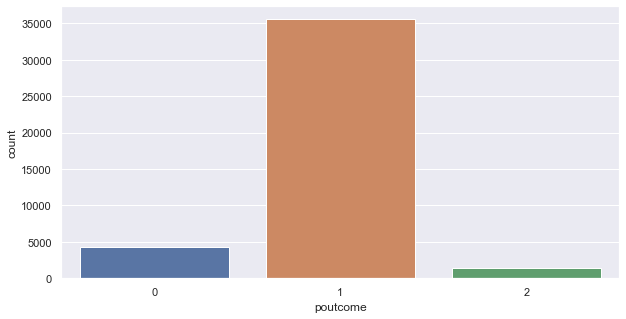

In [38]:
labelencoder = LabelEncoder()
other_info['poutcome'] = labelencoder.fit_transform(other_info['poutcome']) 
sns.countplot(x='poutcome',data=other_info)

In [39]:
other_info.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


#### The data status of contact, month, day_of_week fields

In [40]:
related_info=df.iloc[:,7:11]
related_info.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


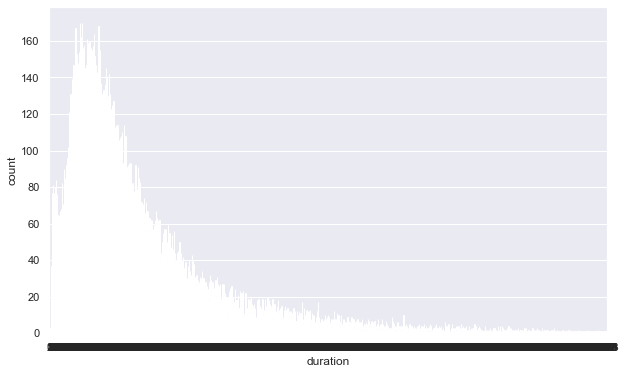

In [41]:
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
sns.countplot(x='duration',data=related_info)

In [42]:
print(related_info['duration'].describe())
higher_outlier=related_info['duration'].quantile(q = 0.75)+1.5*(related_info['duration'].quantile(q = 0.75)-related_info['duration'].quantile(q = 0.25))
lower_outlier=related_info['duration'].quantile(q = 0.25)-1.5*(related_info['duration'].quantile(q = 0.75)-related_info['duration'].quantile(q = 0.25))
print("higher_outlier={}\nlower_outlier={}".format(higher_outlier,lower_outlier))

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
higher_outlier=644.5
lower_outlier=-223.5


In [43]:
def duration(dataframe):
    dataframe.loc[dataframe['duration'] <= 102, 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > 102) & (dataframe['duration'] <= 180)  , 'duration']    = 2
    dataframe.loc[(dataframe['duration'] > 180) & (dataframe['duration'] <= 319)  , 'duration']   = 3
    dataframe.loc[(dataframe['duration'] > 319) & (dataframe['duration'] <= 644.5), 'duration'] = 4
    dataframe.loc[dataframe['duration']  > 644.5, 'duration'] = 5

duration(related_info)

Text(0.5, 1.0, 'Duration distribution chart')

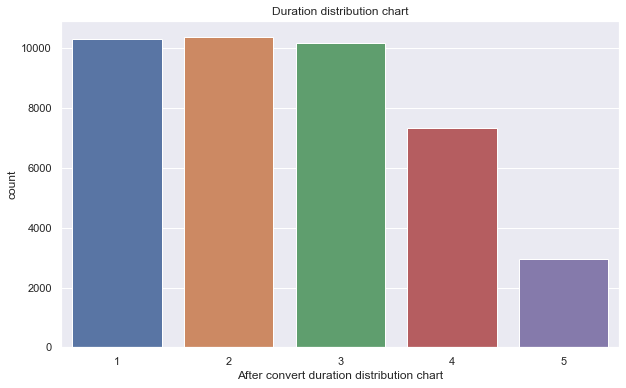

In [44]:
fig,ax=plt.subplots()
fig.set_size_inches(10,6)
sns.countplot(x='duration',data=related_info)
ax.set_xlabel("After convert duration distribution chart")
ax.set_title("Duration distribution chart")

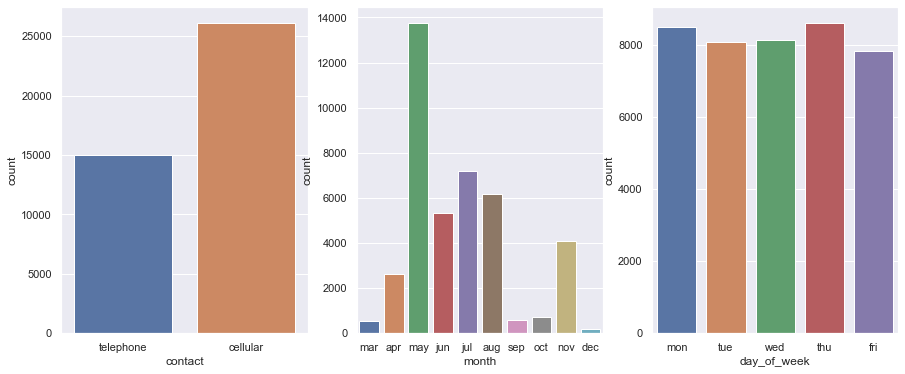

In [45]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.countplot(x='contact',data=related_info,ax=ax1)
sns.countplot(x='month',data=related_info,ax=ax2,order=['mar', 'apr','may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec'])
sns.countplot(x='day_of_week',data=related_info,ax=ax3)

In [46]:
related_info_encoder=related_info.copy()
labelencoder=LabelEncoder()
related_info_encoder['contact']=labelencoder.fit_transform(related_info_encoder['contact'])
related_info_encoder['month']=labelencoder.fit_transform(related_info_encoder['month'])
related_info_encoder['day_of_week']=labelencoder.fit_transform(related_info_encoder['day_of_week'])
related_info_encoder['duration']=labelencoder.fit_transform(related_info_encoder['duration'])

In [47]:
related_info_encoder.head()

,contact,month,day_of_week,duration
0,1,6,1,2
1,1,6,1,1
2,1,6,1,2
3,1,6,1,1
4,1,6,1,2


### Modeling

In [48]:
bank= pd.concat([client_info_encoder, related_info_encoder, other_info, social_info], axis = 1)
bank.columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed']
bank.shape

(41188, 20)

In [49]:
columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [50]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,2,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(bank, data_d, test_size = 0.15, random_state = 1234)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [52]:
x_train.shape,y_train.shape

((35009, 20), (35009, 1))

In [53]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33294,2,9,1,6,1,1,1,0,6,3,3,1,999,1,0,-1.8,92.893,-46.2,1.291,5099.1
16908,3,1,1,0,1,0,0,0,3,2,1,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1
27754,2,9,1,5,0,0,2,0,5,2,2,2,999,0,1,-1.8,92.843,-50.0,1.757,5099.1
10020,3,3,0,7,0,2,0,1,4,2,0,3,999,0,1,1.4,94.465,-41.8,4.958,5228.1
15248,2,1,1,2,0,0,0,1,3,2,0,4,999,0,1,1.4,93.918,-42.7,4.958,5228.1


In [54]:
sc_X = StandardScaler()
x_train_scale = sc_X.fit_transform(x_train)
x_test_scale = sc_X.transform(x_test)

In [55]:
x_train_scale_pd=pd.DataFrame(x_train_scale)
x_train_scale_pd.columns=[x_train.columns]
x_train_scale_pd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.030435,1.462702,-0.286647,1.052521,1.940046,-0.073374,0.925487,-0.759313,0.764679,0.712657,1.156642,-0.901806,0.194093,1.684524,-2.574089,-1.203079,-1.184017,-1.233303,-1.347877,-0.945138
1,1.389481,-0.760278,-0.286647,-1.753285,1.940046,-1.088282,-0.453663,-0.759313,-0.530550,-0.002103,-0.458583,-0.106238,0.194093,-0.348484,0.192760,0.836630,0.591172,-0.475240,0.770596,0.842931
2,0.030435,1.462702,-0.286647,0.584887,-0.515097,-1.088282,2.304637,-0.759313,0.332936,-0.002103,0.349030,-0.106238,0.194093,-0.348484,0.192760,-1.203079,-1.270611,-2.056342,-1.078956,-0.945138
3,1.389481,-0.204533,-1.930148,1.520155,-0.515097,0.941535,-0.453663,1.316980,-0.098807,-0.002103,-1.266195,0.689330,0.194093,-0.348484,0.192760,0.836630,1.538517,-0.280310,0.768288,0.842931
4,0.030435,-0.760278,-0.286647,-0.818016,-0.515097,-1.088282,-0.453663,1.316980,-0.530550,-0.002103,-1.266195,1.484898,0.194093,-0.348484,0.192760,0.836630,0.591172,-0.475240,0.768288,0.842931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35004,1.389481,-1.038151,-1.930148,0.584887,-0.515097,0.941535,-0.453663,1.316980,0.764679,-1.431622,-1.266195,-0.106238,0.194093,-0.348484,0.192760,-1.203079,-1.184017,-1.233303,-1.335181,-0.945138
35005,1.389481,0.351212,-0.286647,-0.350382,1.940046,-1.088282,-0.453663,1.316980,-0.530550,-1.431622,-0.458583,2.280466,0.194093,-0.348484,0.192760,0.836630,0.591172,-0.475240,0.770596,0.842931
35006,0.030435,1.462702,-0.286647,-0.350382,-0.515097,0.941535,-0.453663,1.316980,-1.394036,-1.431622,0.349030,0.689330,0.194093,-0.348484,0.192760,0.836630,-0.229745,0.954249,0.771173,0.842931
35007,0.030435,0.073339,-1.930148,1.052521,-0.515097,-1.088282,-0.453663,-0.759313,0.764679,1.427416,-0.458583,1.484898,0.194093,-0.348484,0.192760,-1.203079,-1.184017,-1.233303,-1.353647,-0.945138


### Feature Selection

In [56]:
sc_X = StandardScaler()
bank_all_info_scale = sc_X.fit_transform(bank)
bank_all_info_scale=pd.DataFrame(bank_all_info_scale)
bank_all_info_scale.columns=[bank.columns]
bank_all_info_scale

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.348401,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.348401,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.459182,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.348401,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.747391,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.029072,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.388231,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.348401,-0.104000,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.029072,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,1.155985,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [57]:
bank_all_info_scale=pd.concat([bank_all_info_scale,data_d],axis = 1)
bank_all_info_scale.columns=[df.columns]
bank_all_info_scale

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.388231,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.388231,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,0.029072,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,...,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,0.029072,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,...,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.388231,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,...,-0.900939,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.747391,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,...,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.029072,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,...,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.388231,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,...,-0.104000,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.029072,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,...,-0.900939,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


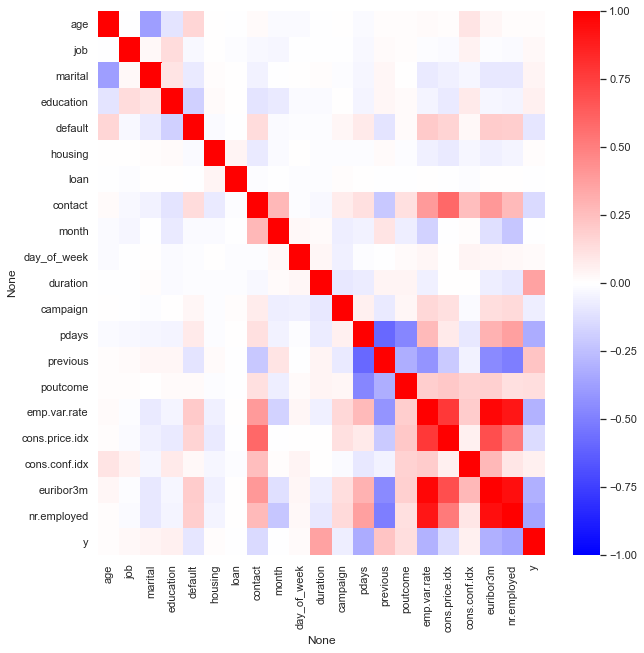

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bank_all_info_scale.corr(),
            vmin=-1,
            vmax=1,
            cmap='bwr',
            cbar=True,
            annot=False,
            ax=ax)

In [59]:
%%time
from sklearn.linear_model import LassoCV
CV_count=3
lasso = LassoCV(cv=CV_count, random_state=1234).fit(x_train_scale_pd, y_train.values.ravel())
coef = np.abs(lasso.coef_)
coef=coef.reshape(1,-1)
df_importance = pd.DataFrame(coef,columns=bank.columns)
df_importance

Wall time: 622 ms


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.002203,0.002602,0.003683,0.007702,0.006208,0.000025,0.000028,0.037603,0.027169,0.003352,0.101946,0.00497,0.043495,0.000131,0.020108,0.182255,0.075772,0.024203,0.114551,0.068474


Index(['emp.var.rate', 'euribor3m', 'duration', 'cons.price.idx',
       'nr.employed', 'pdays', 'contact', 'month', 'cons.conf.idx',
       'poutcome'],
      dtype='object')


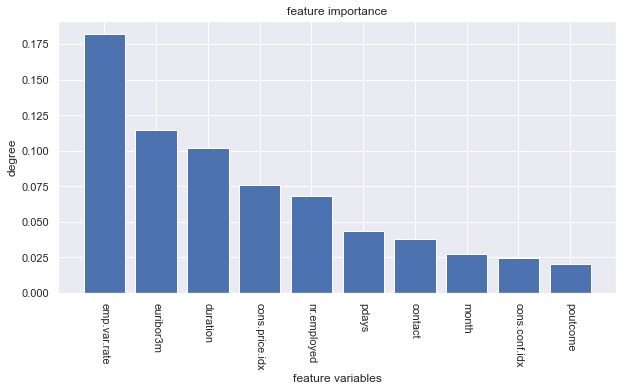

In [60]:
# Showing top 10 important features
n_top_features = 10
df_importance_top = df_importance.median().sort_values(ascending=False)[:n_top_features]
name_features = df_importance_top.index
left = name_features
height = df_importance_top.values
plt.bar(left, height,align="center",linewidth=1)
plt.xticks(rotation=270)
plt.title("feature importance")
plt.xlabel("feature variables")
plt.ylabel("degree")
plt.grid(True)
print(name_features)

In [61]:
x_train_scale = pd.DataFrame(sc_X.fit_transform(x_train[name_features]),
                              columns=x_train[name_features].columns)
x_test_scale = pd.DataFrame(sc_X.transform(x_test[name_features]),
                             columns=x_test[name_features].columns)

In [62]:
x_train_scale.shape,x_test_scale.shape

((35009, 10), (6179, 10))

### Prediction Result Show

#### Using LogisticRegression Model

In [63]:
logmodel = LogisticRegression() 
model=logmodel.fit(x_train_scale,y_train.values.ravel())
logpred = model.predict(x_test_scale)

In [64]:
from sklearn.metrics import plot_confusion_matrix
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, logpred),2)*100))
LOGCV = (cross_val_score(logmodel, x_train_scale, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross Validation={}".format(LOGCV))

Prediction accuracy=91.0 %
Cross Validation=0.9076238870526788


Prediction Subscribe Result Show
[[5353  124]
 [ 411  291]]


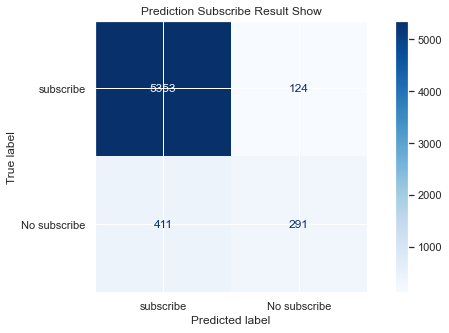

In [65]:
# confusion matrix chart show
disp = plot_confusion_matrix(model, x_test_scale, y_test,
                                 display_labels=['subscribe','No subscribe'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title("Prediction Subscribe Result Show")
print("Prediction Subscribe Result Show")
print(disp.confusion_matrix)
plt.show()

### Using XGBClassifier Model

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scale, y_train.values.ravel())
xgbprd = xgb.predict(x_test_scale)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [69]:
print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = x_train_scale, y = y_train.values.ravel(), cv = 10).mean())

[[5276  201]
 [ 335  367]]
91.0
[18:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[18:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Using SVC Model

In [72]:
%%time

import time
from sklearn import svm
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold


def objective(params):
    params = {
        'C': abs(float(params['C'])),
        "kernel": str(params['kernel']),
    }
    clf = svm.SVC(gamma='scale', **params)
    score = -np.mean(
        cross_val_score(clf,
                        x_train_scale[:10000],
                        y_train.values.ravel()[:10000],
                        cv=3,
                        n_jobs=-1,
                        scoring="neg_mean_squared_error"))

    print("loss score {:.3f} params {}".format(score, params))
    return {'loss': score, 'status': STATUS_OK}

start_time = time.time()
space = {
    'C': hp.normal('C', 0, 50),
    "kernel": hp.choice('kernel', ['rbf']),
}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5)
kernel = ['rbf']
best['kernel'] = kernel[best['kernel']]
best['C'] = abs(best['C'])
hyperparametertuning_time = round(time.time() - start_time, 2)
print(
    "SVC: Hyperopt estimated optimum {}. Hyper parameter tuning spend time {}".
    format(best, hyperparametertuning_time))

loss score 0.096 params {'C': 18.83799131438551, 'kernel': 'rbf'}                                                      
loss score 0.096 params {'C': 20.63742391864753, 'kernel': 'rbf'}                                                      
loss score 0.096 params {'C': 18.89574639332799, 'kernel': 'rbf'}                                                      
loss score 0.096 params {'C': 47.331727557500024, 'kernel': 'rbf'}                                                     
loss score 0.096 params {'C': 12.988045565805612, 'kernel': 'rbf'}                                                     
100%|█████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.70s/trial, best loss: 0.09560002190980944]
SVC: Hyperopt estimated optimum {'C': 12.988045565805612, 'kernel': 'rbf'}. Hyper parameter tuning spend time 8.53
Wall time: 9.17 s


#### Training of SVC

In [73]:
%%time
start_time = time.time()
svc = svm.SVC(gamma='scale', **best)
svc.fit(x_train_scale,y_train.values.ravel())
training_time = round(time.time() - start_time, 2)
print("SVC: Training spend time {}".format(training_time))

SVC: Training spend time 13.76
Wall time: 13.8 s


### Prediction of SVC

In [74]:
svcprd = svc.predict(x_test_scale)
print(confusion_matrix(y_test, svcprd))
print("Prediction accuracy={} %".format(round(accuracy_score(y_test, svcprd),2)*100))
SVC = (cross_val_score(logmodel, x_train_scale, y_train.values.ravel(), cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("Cross Validation={}".format(SVC))

[[5277  200]
 [ 347  355]]
Prediction accuracy=91.0 %
Cross Validation=0.9076238870526788


Prediction Subscribe Result Show
[[5277  200]
 [ 347  355]]


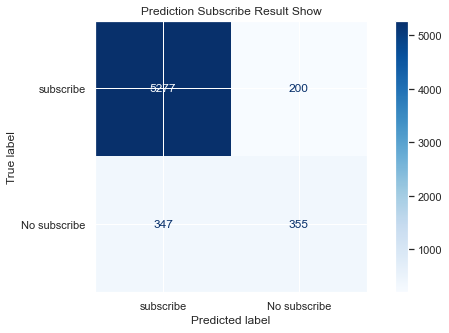

In [75]:
disp = plot_confusion_matrix(svc, x_test_scale, y_test,
                                 display_labels=['subscribe','No subscribe'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title("Prediction Subscribe Result Show")
print("Prediction Subscribe Result Show")
print(disp.confusion_matrix)
plt.show()

### Conclusion

In [77]:
models = pd.DataFrame({
                'Models': ['Logistic Classifier', 'XGBoost','SVClassifier' ],
                'Score':  [LOGCV,XGB,SVC]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,XGBoost,0.912365
0,Logistic Classifier,0.907624
2,SVClassifier,0.907624
